<a href="https://colab.research.google.com/github/swarubm/MACHINE-LEARNING-PROJECTS/blob/main/%2001%20House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [5]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [6]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
type(housing)

sklearn.utils._bunch.Bunch

In [8]:
dataset = pd.DataFrame(housing.data, columns=housing.feature_names)

In [9]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
dataset.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [13]:
dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


EDA

In [14]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


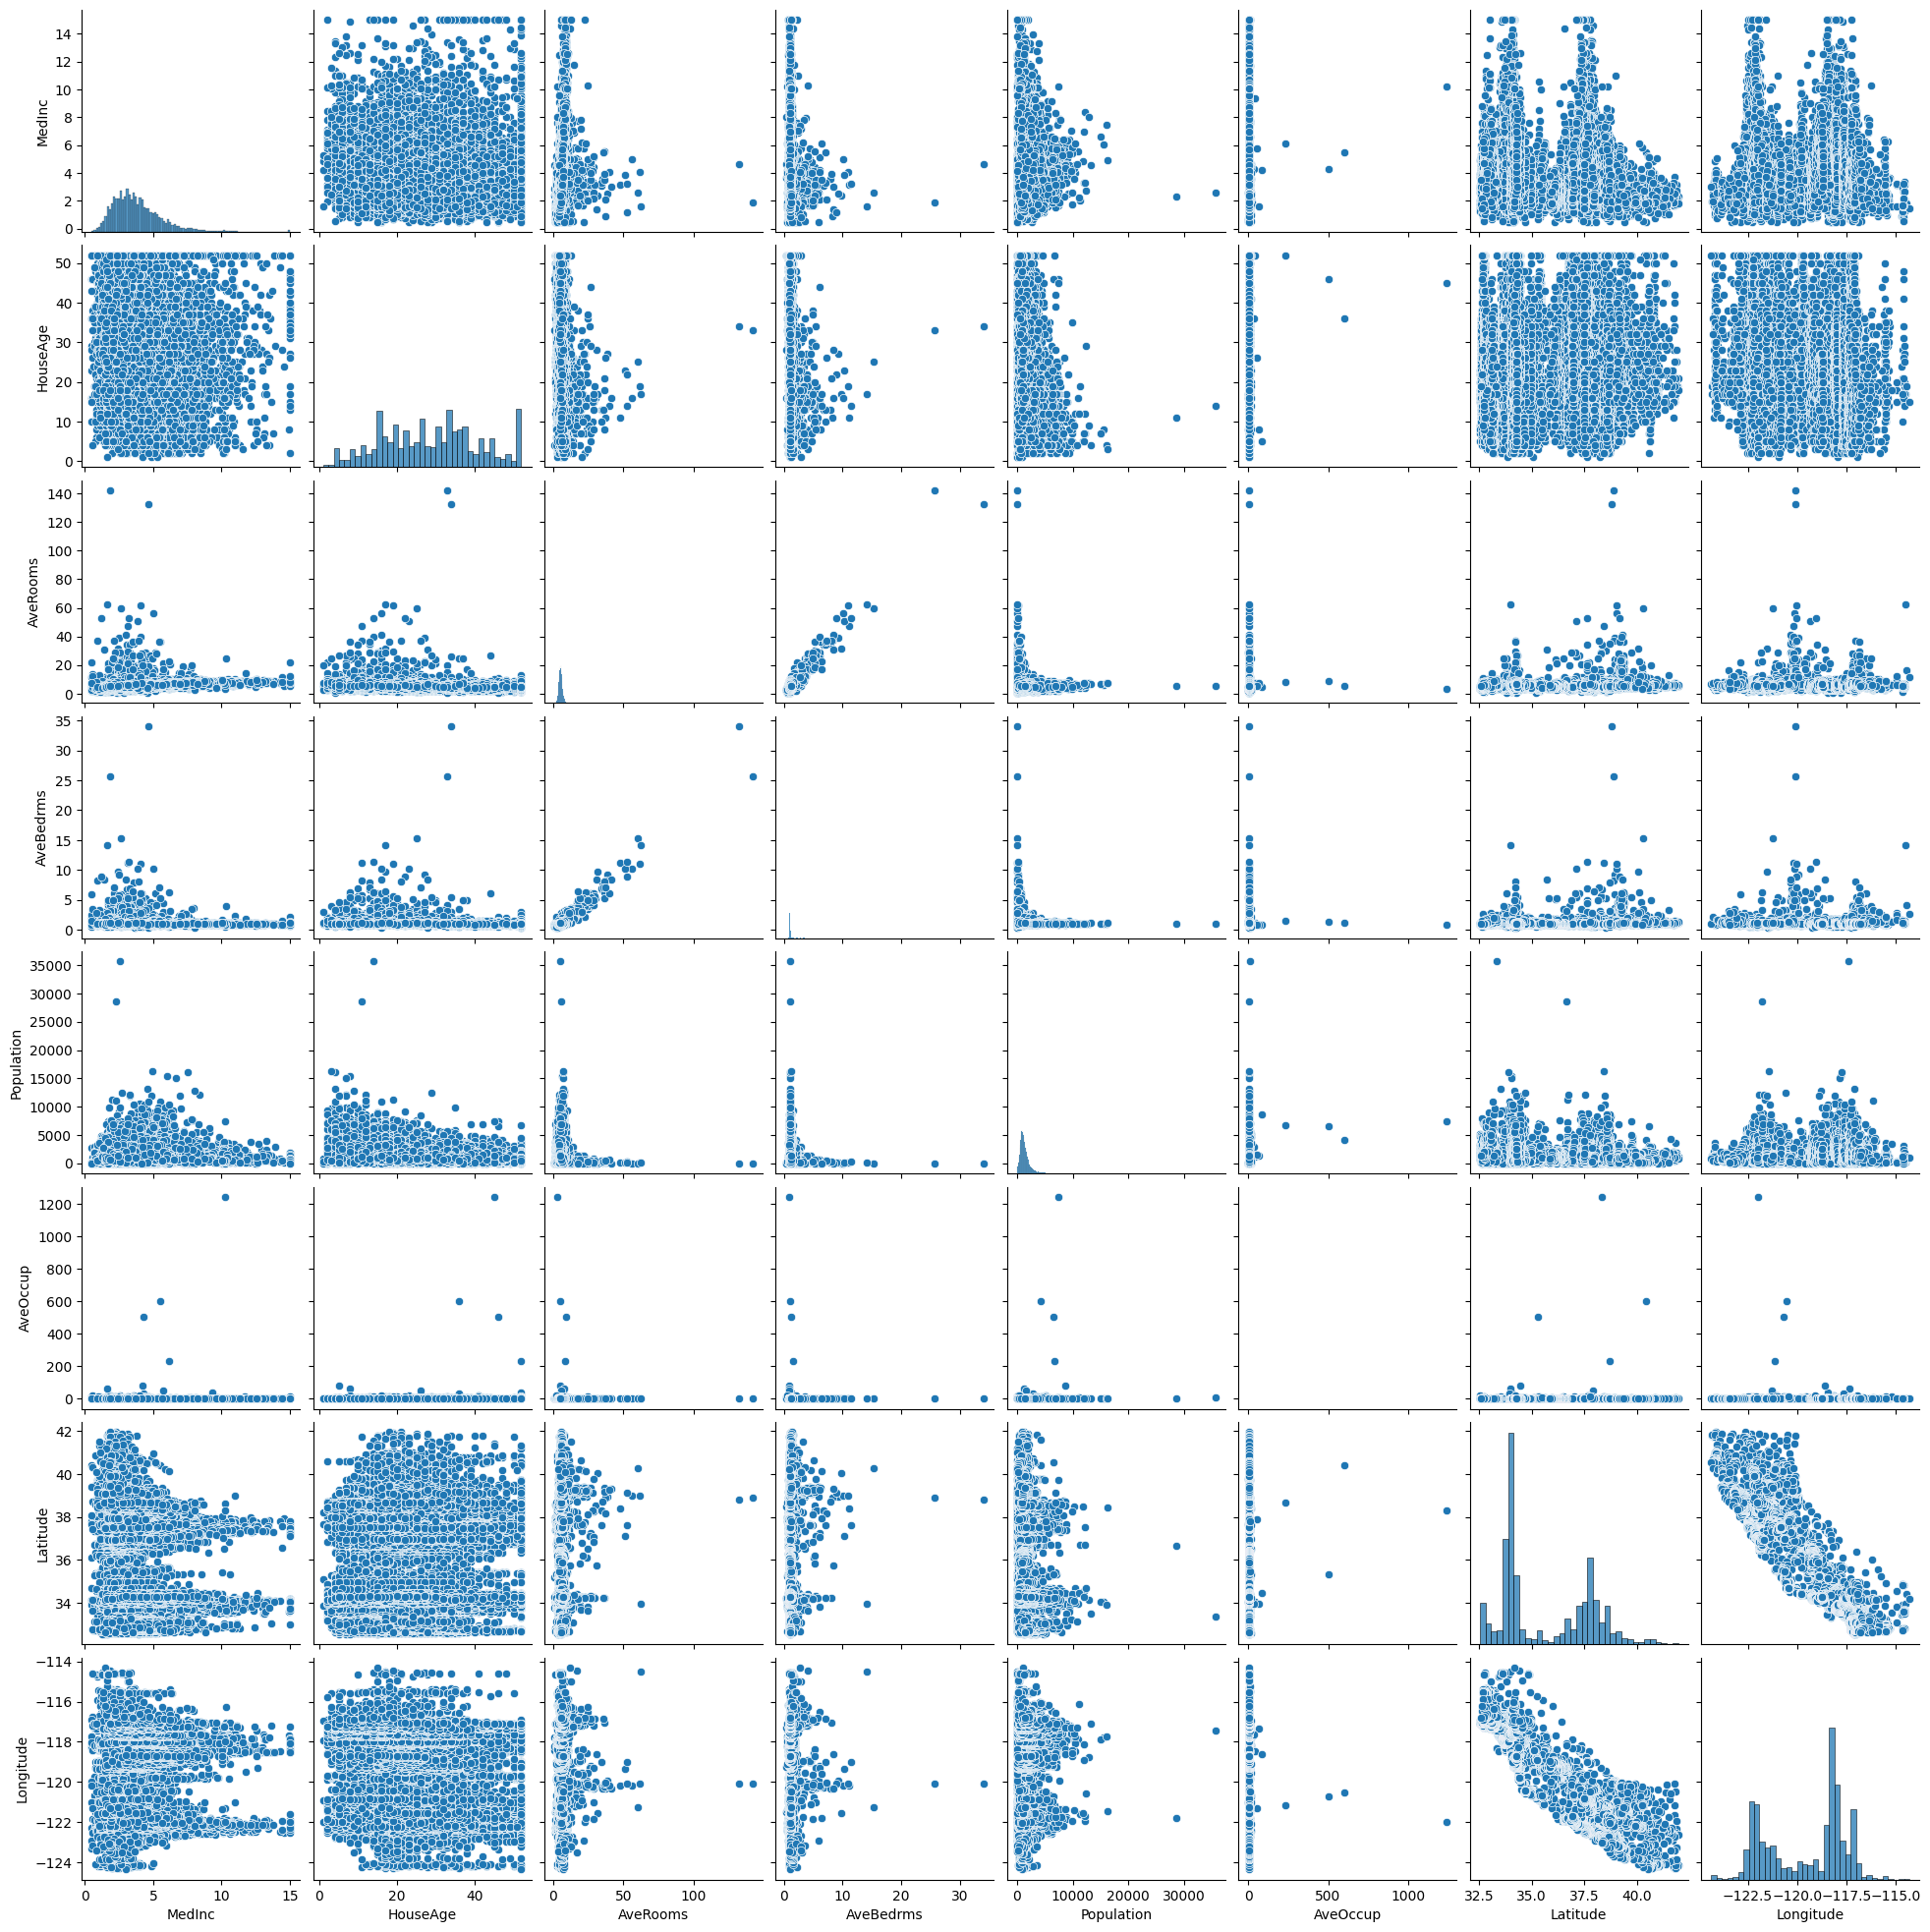

In [15]:
sns.pairplot(dataset)

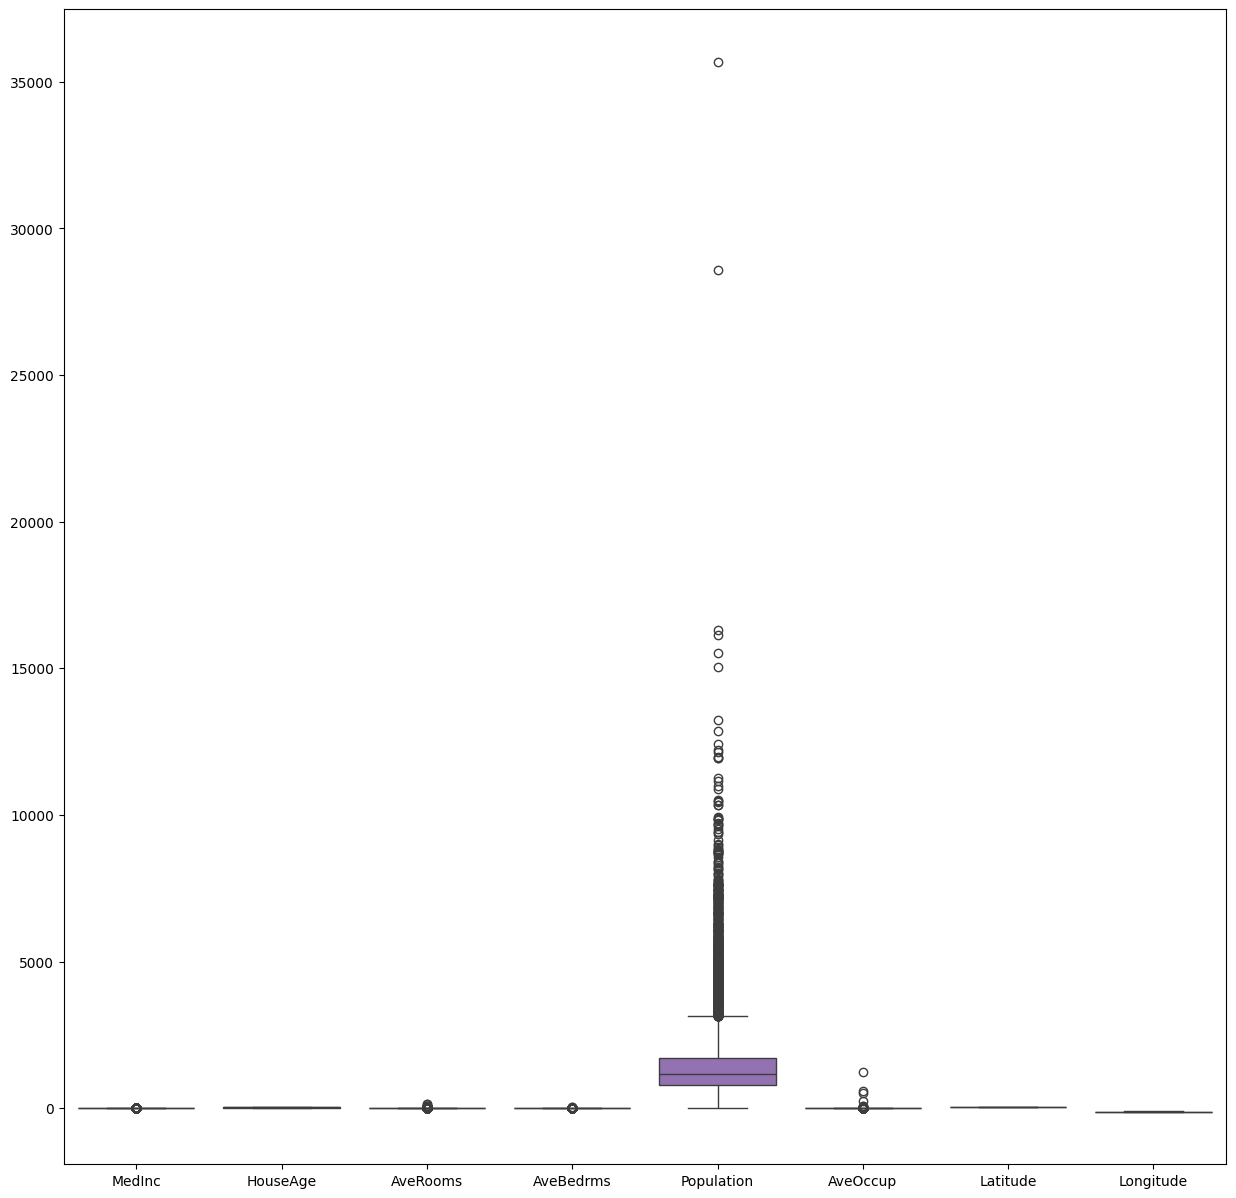

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = dataset,ax=ax)
plt.savefig("boxplot.jpg")

In [18]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [21]:
X


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43


In [20]:
y

,Longitude
0,-122.23
1,-122.22
2,-122.24
3,-122.25
4,-122.25
...,...
20635,-121.09
20636,-121.21
20637,-121.22
20638,-121.32


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [23]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77
...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58


In [24]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62
...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,1.020833,581.0,2.420833,37.36
13512,1.4891,41.0,4.551852,1.118519,994.0,3.681481,34.11
10842,3.5120,16.0,3.762287,1.075614,5014.0,2.369565,33.67
16559,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82


In [25]:
y_train

,Longitude
7061,-118.02
14689,-117.09
17323,-120.14
10056,-121.00
15750,-122.45
...,...
11284,-117.96
11964,-117.43
5390,-118.38
860,-121.96


In [26]:
y_test

,Longitude
20046,-119.01
3024,-119.46
15663,-122.44
20484,-118.72
9814,-121.93
...,...
17505,-121.90
13512,-117.32
10842,-117.91
16559,-121.28


# Normalization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

In [28]:
X_train_norm

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.18411678,
        -0.01082519, -0.80568191],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.37619075,
        -0.08931585, -1.33947268],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.61124018,
        -0.04480037, -0.49664515],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.28773617,
         0.01720102, -0.75885816],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.30615422,
         0.00482125,  0.90338501],
       [-0.68320166,  1.85715216, -0.82965604, ...,  1.0446304 ,
        -0.0816717 ,  0.99235014]])

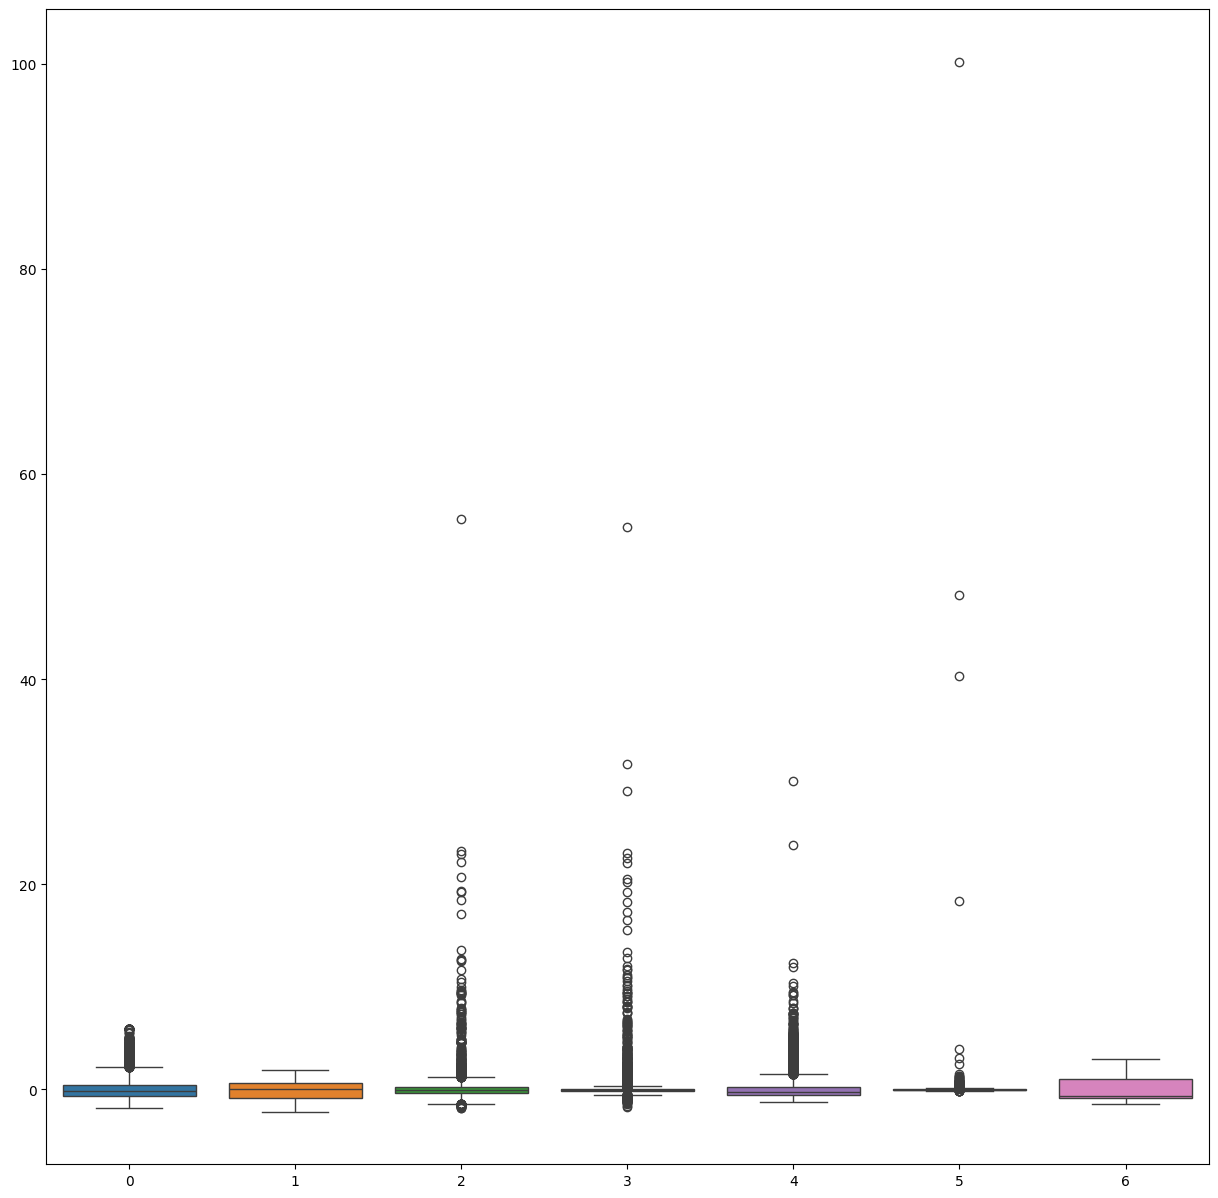

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = X_train_norm, ax=ax)
plt.savefig("boxPlotTrainData.jpg")

In [30]:
X_test_norm = scaler.transform(X_test)

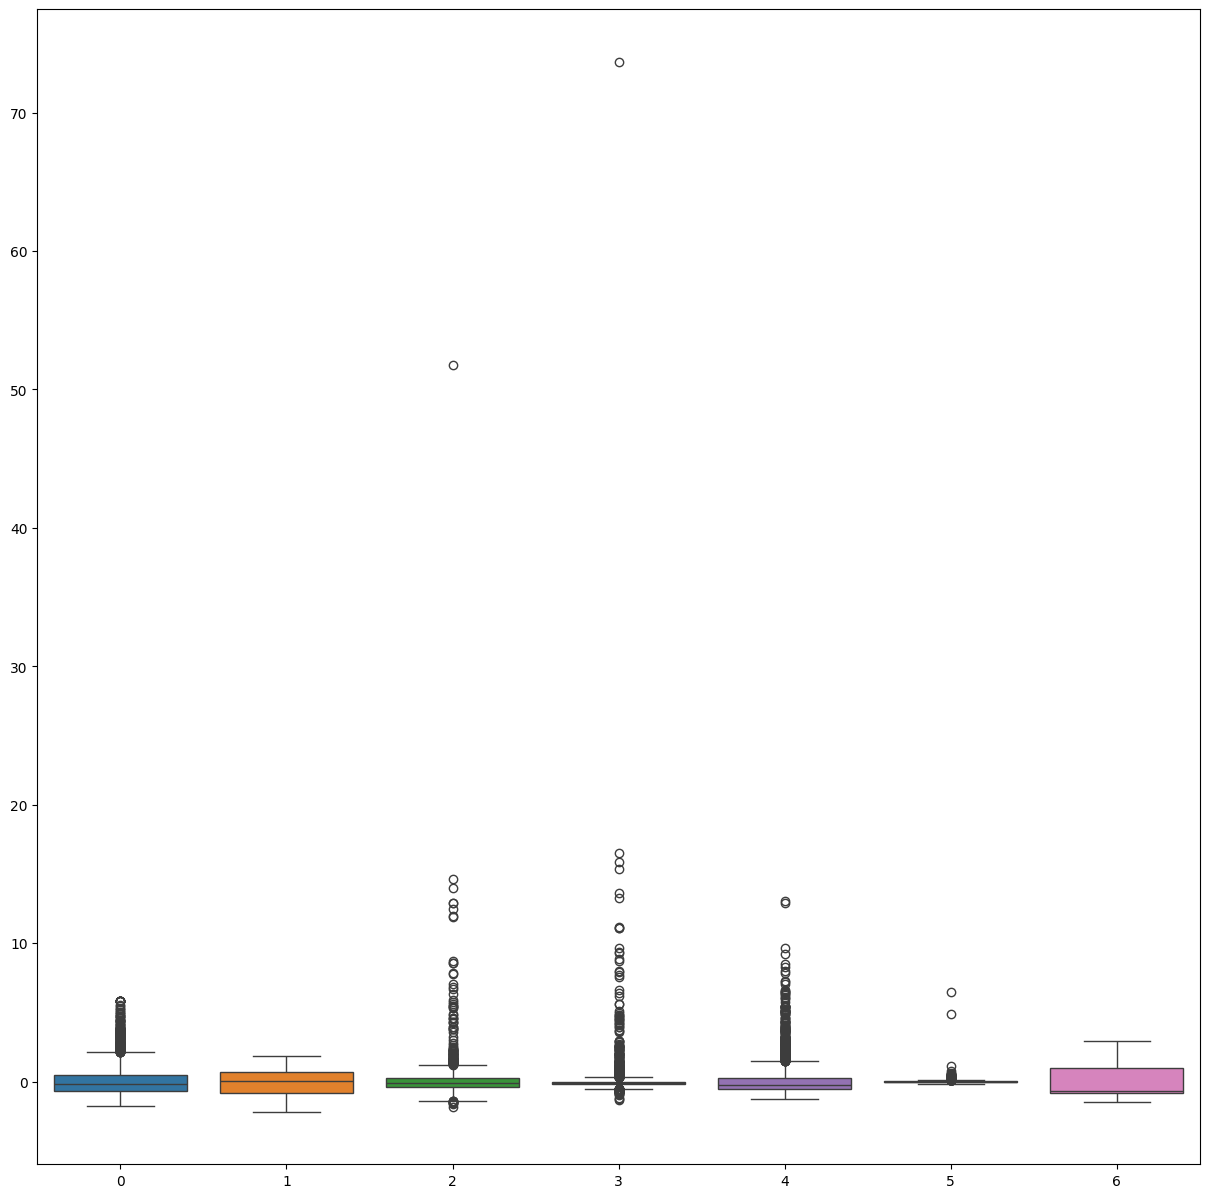

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = X_test_norm, ax=ax)
plt.savefig("boxPlotTestData.jpg")

In [32]:
import pickle
with open('scaling_new.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [33]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_norm, y_train)

LinearRegression()

In [34]:
print(regression.coef_)

[-0.38306674 -0.2062471   0.47933705 -0.27941541 -0.05497227  0.02780921
 -1.91642044]


In [35]:
print(regression.intercept_)

-119.58410229789591


In [36]:
reg_pred = regression.predict(X_test_norm)
reg_pred

array([-119.64407164, -119.02365809, -122.15456798, ..., -118.0157511 ,
       -121.36168682, -118.37097406])

In [37]:
residuals = y_test - reg_pred

In [38]:
residuals

,Longitude
20046,0.634072
3024,-0.436342
15663,-0.285432
20484,-0.358654
9814,-1.488514
...,...
17505,-0.511030
13512,0.768331
10842,0.105751
16559,0.081687


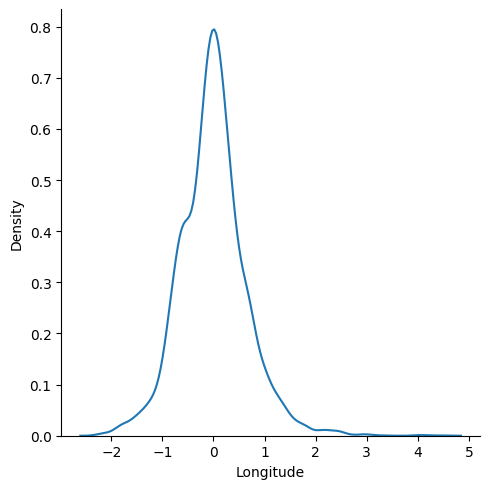

In [39]:
sns.displot(residuals, kind="kde")

# Model Performance

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(r2_score(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

0.4243945093976118
0.48178029123742255
0.8943806162452037
0.6514556849069718


In [41]:
score = r2_score(y_test, reg_pred)
score

0.8943806162452037

In [42]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test_norm.shape[1]-1)

0.8942610600216779

In [43]:
X_test_norm.shape[1]

7

In [44]:
import pickle
pickle.dump(regression, open('model.pkl', 'wb'))

In [45]:
model = pickle.load(open('model.pkl', 'rb'))

In [48]:
model.predict(scaler.transform(housing.data[0][:-1].reshape(1,-1)))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-122.28185261])

In [47]:
model.predict(X_test_norm)

array([-119.64407164, -119.02365809, -122.15456798, ..., -118.0157511 ,
       -121.36168682, -118.37097406])